In [47]:
import pandas as pd 
import category_encoders as ce 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns 

In [21]:
car=pd.read_csv('./car_evaluation.csv')
car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [22]:
car.shape

(1727, 7)

In [23]:
car.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [24]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [25]:
col=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [26]:
car.columns=col

In [27]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [70]:
for i in car.columns:
    print(car[i].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [41]:
for i in col:
    print(car[i].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [28]:
y=car['class']

In [29]:
x=car.drop(columns='class')

In [30]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [31]:
encoder=ce.OrdinalEncoder()

In [34]:
y.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [35]:
x=encoder.fit_transform(x)

In [36]:
x

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,2,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1722,4,4,4,3,2,1
1723,4,4,4,3,2,2
1724,4,4,4,3,3,3
1725,4,4,4,3,3,1


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [43]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred=model.predict(x_test)

In [46]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         acc       0.94      0.94      0.94       105
        good       0.81      0.76      0.79        17
       unacc       1.00      0.99      0.99       292
       vgood       0.76      0.89      0.82        18

    accuracy                           0.97       432
   macro avg       0.88      0.90      0.89       432
weighted avg       0.97      0.97      0.97       432



In [66]:
x.iloc[:1]

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1


In [68]:
model.predict([[1,1,1,1,1,1]])

E:\program\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['unacc'], dtype=object)

In [48]:
cm=metrics.confusion_matrix(y_pred,y_test)
cm 

array([[ 99,   2,   1,   3],
       [  2,  13,   0,   2],
       [  3,   0, 289,   0],
       [  1,   1,   0,  16]], dtype=int64)

<Axes: >

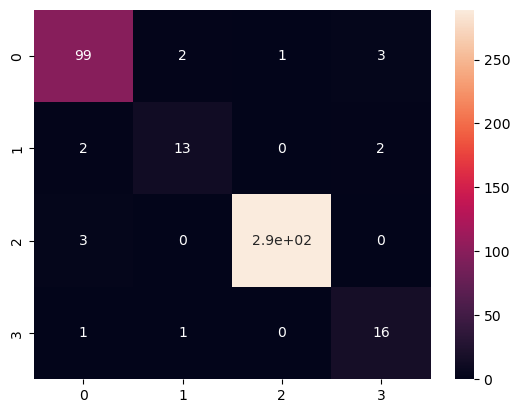

In [49]:
sns.heatmap(cm,annot=True)

In [50]:
y_test.value_counts()

unacc    290
acc      105
vgood     21
good      16
Name: class, dtype: int64

In [72]:
#gini model
DT_model=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
DT_model.fit(x_train,y_train)
#ملحظه كل م maxيزيد كل م الكفائه هتبقى عاليه 

DecisionTreeClassifier(max_depth=4, random_state=0)

In [73]:
gini_y_pred=DT_model.predict(x_test)

In [74]:
print(metrics.classification_report(gini_y_pred,y_test))

              precision    recall  f1-score   support

         acc       0.70      0.78      0.74        95
        good       1.00      0.32      0.48        50
       unacc       0.94      0.95      0.95       287
       vgood       0.00      0.00      0.00         0

    accuracy                           0.84       432
   macro avg       0.66      0.51      0.54       432
weighted avg       0.90      0.84      0.85       432



E:\program\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\program\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\program\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
cmm=metrics.confusion_matrix(gini_y_pred,y_test)
cmm

array([[ 74,   0,  15,   6],
       [ 18,  16,   1,  15],
       [ 13,   0, 274,   0],
       [  0,   0,   0,   0]], dtype=int64)

<Axes: >

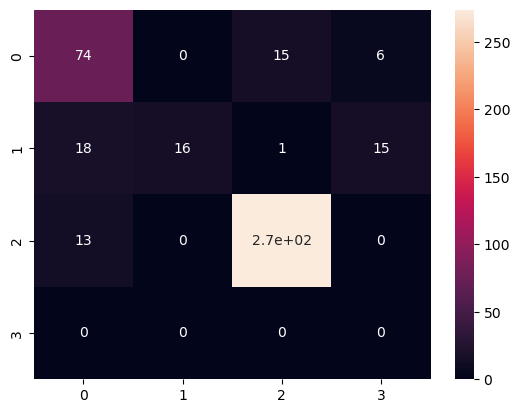

In [76]:
sns.heatmap(cmm,annot=True)

In [77]:
y_test.value_counts()

unacc    290
acc      105
vgood     21
good      16
Name: class, dtype: int64

[Text(0.5, 0.9, 'x[5] <= 2.5\ngini = 0.447\nsamples = 1295\nvalue = [279, 53, 919, 44]'),
 Text(0.375, 0.7, 'x[3] <= 1.5\ngini = 0.575\nsamples = 849\nvalue = [279, 53, 473, 44]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 277\nvalue = [0, 0, 277, 0]'),
 Text(0.5, 0.5, 'x[0] <= 2.5\ngini = 0.63\nsamples = 572\nvalue = [279, 53, 196, 44]'),
 Text(0.25, 0.3, 'x[1] <= 2.5\ngini = 0.497\nsamples = 293\nvalue = [135, 0, 158, 0]'),
 Text(0.125, 0.1, 'gini = 0.273\nsamples = 141\nvalue = [23, 0, 118, 0]'),
 Text(0.375, 0.1, 'gini = 0.388\nsamples = 152\nvalue = [112, 0, 40, 0]'),
 Text(0.75, 0.3, 'x[1] <= 2.5\ngini = 0.654\nsamples = 279\nvalue = [144, 53, 38, 44]'),
 Text(0.625, 0.1, 'gini = 0.424\nsamples = 137\nvalue = [99, 0, 31, 7]'),
 Text(0.875, 0.1, 'gini = 0.69\nsamples = 142\nvalue = [45, 53, 7, 37]'),
 Text(0.625, 0.7, 'gini = 0.0\nsamples = 446\nvalue = [0, 0, 446, 0]')]

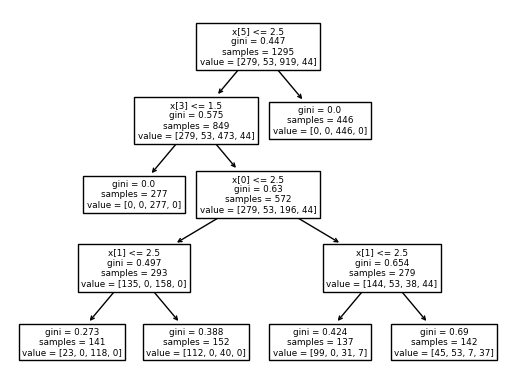

In [78]:
from sklearn import tree
tree.plot_tree(DT_model.fit(x_train,y_train))

([<matplotlib.patches.Wedge at 0x1e2116da350>,
 [Text(-0.5637967574304512, 0.9445280389225663, 'unacc'),
  Text(0.29242020893328957, -1.0604199269192425, 'acc'),
  Text(1.0193018321674128, -0.4135502084876225, 'vgood'),
  Text(1.0925621934054306, -0.12770220648491112, 'good')],
 [Text(-0.30752550405297335, 0.5151971121395816, '67.1%'),
  Text(0.15950193214543065, -0.5784108692286776, '24.3%'),
  Text(0.5559828175458614, -0.2255728409932486, '4.9%'),
  Text(0.5959430145847803, -0.0696557489917697, '3.7%')])

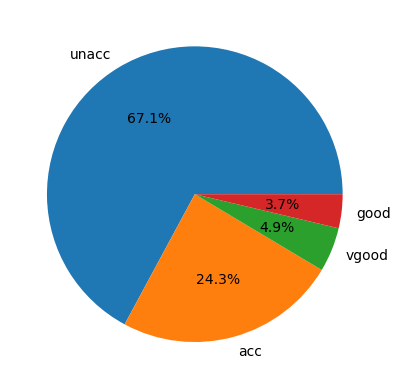

In [82]:
plt.pie(y_test.value_counts(),labels=['unacc','acc','vgood','good'],autopct='%1.1f%%')